In [22]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from random import randint
import pickle

Generating 500 users to train KMeans model.

In [12]:
users = []

for n in range(50):
  num_tags = randint(3,10)
  
  if (n + 1) % 10 == 0:
    num_tags = randint(10,25)
  
  for i in range(10):
    user = [0 for x in range(25)]
    count = 0
    
    for j in range(25):
      if count < num_tags:
        if j == 7:
          if user[6] != 0:
            user[j] = 3 - user[6]
          
          else:
            user[j] == randint(0,3)
        
        elif j == 11:
          if user[9] != 0:
            user[j] = 3 - user[9]
          
          else:
            user[j] = randint(0,3)
        
        elif j == 19:
          if user[17] != 0:
            user[j] = 3 - user[17]
          
          else:
            user[j] = randint(0,3)
        
        else:
          user[j] = randint(0,3)
        
        user[j] = user[j] * randint(0,1)
        
        if user[j] != 0:
          count += 1
    
    users.append(user)

print(users[83])
    


[0, 3, 1, 1, 3, 2, 0, 0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [18]:
squared_error = []
silhouette_average = []

for i in range(2,101):
  model = KMeans(n_clusters=i, max_iter = 500)
  model.fit(users)
  squared_error.append(model.inertia_)
  labels = model.labels_
  silhouette_average.append(silhouette_score(users, labels))




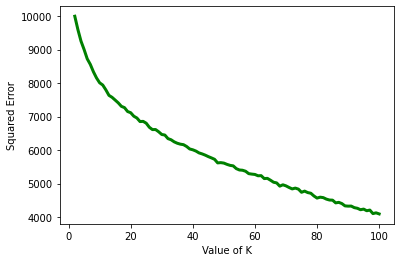

In [20]:
plt.plot(range(2, 101), squared_error, color ='g', linewidth ='3')
plt.xlabel("Value of K")
plt.ylabel("Squared Error")
plt.show()

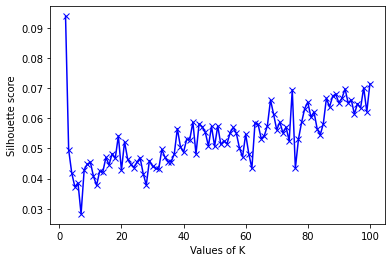

In [21]:
plt.plot(range(2,101),silhouette_average,'bx-')
plt.xlabel('Values of K') 
plt.ylabel('Silhouette score') 
plt.show()

Silhouette score isn't great for any particular K, but none produce a negative score, so they're all somewhat viable. I'll choose a K of 18 since it acts as a local max in the silhouette, and has a relatively sharp turn in the squared error plot.

In [23]:
final_model = KMeans(n_clusters=18, max_iter=500)
final_model.fit(users)

pickle.dump(final_model, open("model.pkl", "wb"))
